# <font color="orange"><i>Ad. Sale Prediction from Existing Customer</font>
* <font color="green"><i>Logistic Regression</font>
* <b>By NaKKA SHEKHAR</b>
* linked in: https://www.linkedin.com/in/nakka-shekhar-2019a987/   
* github : https://github.com/shekhar443/MACHINE-LEARNING-PROJECT

## this topic will cover the following steps
* Importing Required Libraries
* Data Profiling / Data Loading
* Summarize Dataset
* check Null Values and Duplicate Values
* Statistical Analysis of data
* EDA and FE
* Segregate Data into X and y(Independent and Independent Features)
* Splitting data into Train and Test
* Feature Scaling
* model Building and Training
* prediction for new data
* prediction for all test data
* model evaluation

### Importing Required Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

### Data Profiling / Data Loading

In [2]:
df=pd.read_csv("ML//DigitalAd_dataset.csv")

### Summarize Dataset

In [3]:
df.head()

,Age,Salary,Status
0,18,82000,0
1,29,80000,0
2,47,25000,1
3,45,26000,1
4,46,28000,1


In [4]:
r,c=df.shape
print("the dataset having {0} rows and {1} columns".format(r,c))

the dataset having 400 rows and 3 columns


In [5]:
print(df.size)

1200


In [6]:
df.columns

Index(['Age', 'Salary', 'Status'], dtype='object')

In [7]:
df.dtypes

Age       int64
Salary    int64
Status    int64
dtype: object

### Check Null Values and Duplicate Values

In [8]:
# checking null values
df.isnull().sum()

Age       0
Salary    0
Status    0
dtype: int64

In [9]:
# checking duplicate values
df.duplicated().sum()

33

### Statistical Analysis of data

In [10]:
numerical_columns=df.select_dtypes(exclude="O")
numerical_columns

,Age,Salary,Status
0,18,82000,0
1,29,80000,0
2,47,25000,1
3,45,26000,1
4,46,28000,1
...,...,...,...
395,35,65000,0
396,26,80000,0
397,26,52000,0
398,20,86000,0


In [11]:
categorical_columns=df.select_dtypes(include="O")
categorical_columns

""
0
1
2
3
4
...
395
396
397
398


In [12]:
# Data not having any categorical features

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   Age     400 non-null    int64
 1   Salary  400 non-null    int64
 2   Status  400 non-null    int64
dtypes: int64(3)
memory usage: 9.5 KB


In [14]:
df.describe()

,Age,Salary,Status
count,400.000000,400.000000,400.000000
mean,37.655000,69742.500000,0.357500
std,10.482877,34096.960282,0.479864
min,18.000000,15000.000000,0.000000
25%,29.750000,43000.000000,0.000000
50%,37.000000,70000.000000,0.000000
75%,46.000000,88000.000000,1.000000
max,60.000000,150000.000000,1.000000


In [15]:
for i in df.columns:
    print("****"*7,i,"****"*5)
    print(df[i].unique())

**************************** Age ********************
[18 29 47 45 46 48 49 31 27 21 28 35 33 30 26 23 25 24 22 32 59 20 34 39
 19 38 37 42 40 36 41 58 55 52 60 56 53 50 51 57 44 43 54]
**************************** Salary ********************
[ 82000  80000  25000  26000  28000  29000  22000  49000  41000  23000
  20000  30000  43000  18000  74000 137000  16000  44000  90000  27000
  72000  31000  17000  51000 108000  15000  84000  79000  54000 135000
  89000  32000  83000  58000  55000  48000 117000  87000  66000 120000
  19000  63000  68000 113000 112000  52000  42000  88000  62000 118000
  85000  81000  50000 116000 123000  73000  37000  59000  86000 149000
  21000  35000  71000  61000  57000  75000  53000  65000 107000  96000
  45000  76000  47000 100000  33000  38000  69000 148000 115000  34000
  60000  70000  36000  39000 134000 101000 130000 114000 142000 150000
  78000 143000  91000 144000 102000 126000 133000 147000 104000 146000
 122000  97000  95000 131000  77000 125000 1060

In [16]:
for i in df.columns:
    print("****"*7,i,"****"*5)
    print(df[i].value_counts())

**************************** Age ********************
35    32
37    20
41    16
42    16
26    16
39    15
40    15
47    14
48    14
38    13
27    13
36    12
46    12
28    12
30    11
31    11
29    10
49    10
33     9
24     9
32     9
20     7
19     7
60     7
59     7
45     7
34     6
52     6
23     6
58     6
25     6
53     5
57     5
18     5
22     5
50     4
21     4
54     4
55     3
56     3
51     3
43     3
44     2
Name: Age, dtype: int64
**************************** Salary ********************
72000     12
80000     11
79000     10
75000      9
71000      9
          ..
69000      1
100000     1
116000     1
123000     1
139000     1
Name: Salary, Length: 117, dtype: int64
**************************** Status ********************
0    257
1    143
Name: Status, dtype: int64


### EDA and FE

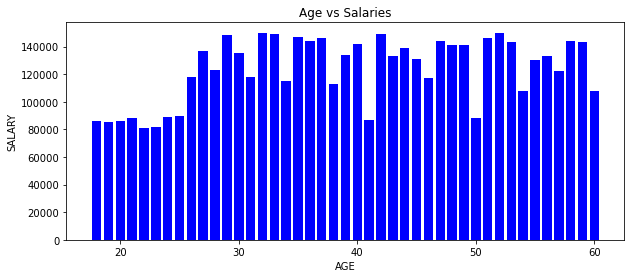

In [17]:
plt.figure(figsize=(10,4))
plt.bar(df.Age,df.Salary,color="b")
plt.title("Age vs Salaries")
plt.xlabel("AGE")
plt.ylabel("SALARY")
plt.show()

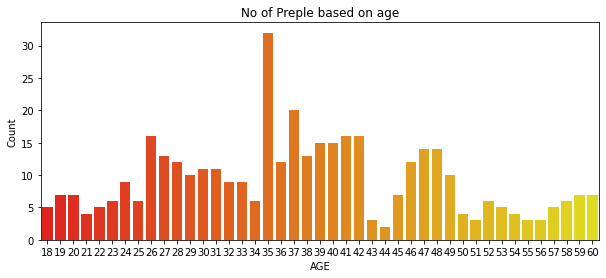

In [18]:
plt.figure(figsize=(10,4))
sns.countplot(df.Age,color="b",palette="autumn")
plt.title("No of Preple based on age")
plt.xlabel("AGE")
plt.ylabel("Count")
plt.show()

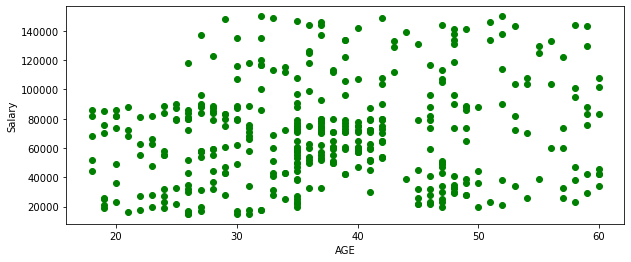

In [19]:
plt.figure(figsize=(10,4))
plt.scatter(df.Age,df.Salary,color="g")
plt.xlabel("AGE")
plt.ylabel("Salary")
plt.show()

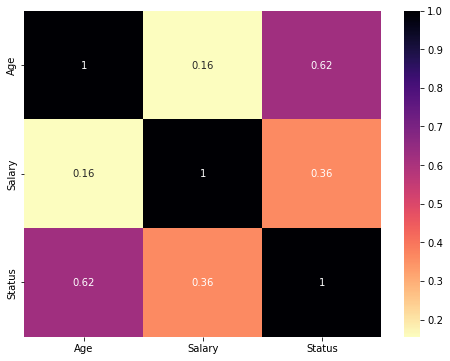

In [20]:
plt.figure(figsize=(8,6))
sns.heatmap(df.corr(),annot=True,cmap="magma_r")
plt.show()

In [21]:
# Allthe features are highely corrilated with each other

### Segregate Data into X and y (Independent and Independent Features)

In [22]:
X=df.iloc[:,:-1].values
y=df.iloc[:,-1].values

In [23]:
print(X.shape,y.shape)

(400, 2) (400,)


### Splitting data into Train and Test

In [24]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.33,random_state=0)

### Feature Scaling

In [25]:
from sklearn.preprocessing import StandardScaler
ss=StandardScaler()
X_train = ss.fit_transform(X_train)
X_test = ss.transform(X_test)

### Model Building and Training

In [26]:
from sklearn.linear_model import LogisticRegression
LR=LogisticRegression(random_state=42)
LR.fit(X_train,y_train)

LogisticRegression(random_state=42)

### prediction for new data

In [27]:
age=int(input("Enter Customer's Age : "))
salary=int(input("Enter Customer's Salary : "))
newCust=[[age,salary]]
result=LR.predict(ss.transform(newCust))
print(result)
if result==1:
    print("Customer will buy the product")
else:
    print("Customer will not buy the product")

Enter Customer's Age : 55
Enter Customer's Salary : 565656
[1]
Customer will buy the product


### prediction for all test data

In [28]:
y_pred=LR.predict(X_test)
y_pred

array([0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0,
       0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0],
      dtype=int64)

In [29]:
print(np.concatenate((y_pred.reshape(len(y_pred),1),y_test.reshape(len(y_test),1)),1))

[[0 1]
 [0 1]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 1]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 1]
 [0 0]
 [0 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 1]
 [0 0]
 [0 1]
 [0 0]
 [0 1]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 1]
 [0 0]
 [0 0]
 [1 1]
 [0 1]
 [0 1]
 [0 1]
 [1 1]
 [0 1]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 1]
 [0 1]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 1]
 [1 1]
 [0 1]
 [0 0]
 [0 0]
 [1 1]
 [0 1]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [0 1]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 1]
 [1 0]
 [0 0]
 [0 0]
 [1 1]
 [0 1]
 [0 0]
 [0 1]]


### Model evaluation

In [30]:
from sklearn.metrics import confusion_matrix,accuracy_score
cm=confusion_matrix(y_test,y_pred)
print("Confusion Matrix : ")
print(cm)

Confusion Matrix : 
[[79  1]
 [24 28]]


In [31]:
print("Percenage of Accuracy is : ",((accuracy_score(y_test,y_pred))*100).round(2),"%")

Percenage of Accuracy is :  81.06 %
